# <center> Анализ поведения клиентов на автозаправочных станциях

## Описание датасета
* **id_client** – ID клиента
* **product_type** – Тип продукта
* **operation_type** – Тип операции
* **date** – Дата операции
* **count** – Количество товаров
* **price** – Цена товара
* **amount** – Стоимость покупки
* **product** – Наименование продукта
* **cash** – Доход с транзакции
* **plus_points** – Начисление баллов
* **minus_points** – Списание баллов
* **card_type** – Уровень участия в программе лояльности
* **id_trans** – ID транзакции
* **date_start** – Дата активации карты лояльности
* **station** – Номер станции 

## 1. Предподготовка данных

In [1]:
# Импортирование необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("talk", font_scale = 1)
sns.set_palette('tab10')

In [2]:
# Считывание данных
data = pd.read_csv('Тест.csv',  encoding = "cp1251", sep = ';')

In [3]:
# Переименование факторов для удобства

# Словарь с именами
rename_dict = {'PAN':'id_client',
               'Тип_Продукта':'product_type',
               'Тип_Операции':'operation_type',
               'ДатаОперации':'date',
               'COUNT':'count',
               'PRICE':'price',
               'SUMMA':'amount',
               'Продукт':'product',
               'CASH_AMOUNT':'cash',
               'Начисление':'plus_points',
               'Списание':'minus_points',
               'CRD_TYPE':'card_type',
               'TRANS_ID':'id_trans',
               'Дата_Активации':'date_start',
               'Станция':'station',
              }
# Переименование
data.rename(columns = rename_dict, inplace = True)

In [4]:
# Трансформация данных в нужный формат

# Числовые
num_columns = ['count','price','amount','cash','plus_points','minus_points']

for column in num_columns:
    data[column] = data[column].apply(lambda x: float(x.replace(',','.')))

# Текстовые    
object_columns = ['id_client','product_type','operation_type','product','id_trans','station']

for column in object_columns:
    data[column] = data[column].apply(lambda x: str(x))

# Дата
data['date'] = pd.to_datetime(data['date'])
data['date_start'].apply(lambda x: pd.to_datetime(x) if x != ' ' else np.nan)

0        2017-01-22 13:50:34
1        2017-01-22 13:50:34
2        2017-01-23 05:44:13
3        2017-01-23 05:44:13
4        2017-01-23 05:44:13
                 ...        
106793   2017-04-20 14:06:15
106794   2017-04-20 14:06:15
106795   2017-04-21 03:44:01
106796   2017-04-21 03:44:01
106797   2017-04-21 03:44:01
Name: date_start, Length: 106798, dtype: datetime64[ns]

## 2. Общий взгляд на датасет

In [5]:
# Описательная статистиска по вещественным переменным

data[num_columns].describe().round(2)

,count,price,amount,cash,plus_points,minus_points
count,106798.00,106798.00,106798.00,106798.00,106798.00,106798.00
mean,21.22,62.25,861.48,1212.69,16.69,8.69
std,20.98,70.19,802.20,867.53,23.39,68.46
min,0.04,0.01,0.01,0.01,0.00,0.00
25%,1.00,37.69,178.00,506.00,3.68,0.00
50%,17.50,40.29,700.00,1000.00,10.00,0.00
75%,33.44,59.00,1315.58,1673.17,20.00,0.00
max,730.00,3349.00,28535.70,28535.70,1000.00,4988.67


In [6]:
start_date = data['date'].min()
end_date = data['date'].max()
print(f'Данные предоставлены за период: {start_date} - {end_date}')

Данные предоставлены за период: 2017-06-01 00:00:00 - 2017-07-31 00:00:00


In [7]:
# Уникальные клиенты

uniq_clients = data['id_client'].nunique()
print(f'Количество уникальных клиентов = {uniq_clients}')

Количество уникальных клиентов = 21968


In [8]:
# Тип продуктов

uniq_product_types = data['product_type'].unique()
print('Типы продуктов на станциях:','\n')
print(*uniq_product_types, sep = ', ')

Типы продуктов на станциях: 

Топливо, СОПУТКА


In [9]:
# Тип операций

uniq_operation_types = data['operation_type'].unique()
print('Типы операций на станциях:','\n')
print(*uniq_operation_types, sep = ', ')

Типы операций на станциях: 

97, 0


In [10]:
# Количество уникальных продуктов

uniq_products = data['product'].nunique()

uniq_fuel_products = data.query('product_type == "Топливо"')['product'].unique()
uniq_nfuel_products = data.query('product_type != "Топливо"')['product'].nunique()

print(f'Количество уникальных продуктов = {uniq_products}','\n')
print('Виды топлива:','\t') 
print(*uniq_fuel_products, sep = ', ')

Количество уникальных продуктов = 1737 

Виды топлива: 	
АИ-92, ДТ Ult, АИ-95, АИ-95 Ult, ДТ, АИ-98 Ult


In [11]:
# Топливо на станциях
data\
.query('product_type == "Топливо"')\
.groupby('station')\
.agg({'product':'unique'})

,product
station,
1,"[АИ-95, АИ-92, ДТ Ult, АИ-95 Ult, ДТ, АИ-98 Ult]"
2,"[АИ-92, АИ-95, ДТ Ult, АИ-95 Ult, ДТ, АИ-98 Ult]"
3,"[АИ-92, ДТ Ult, АИ-95, АИ-95 Ult, АИ-98 Ult]"
4,"[АИ-95, АИ-98 Ult, АИ-92, ДТ, АИ-95 Ult]"
5,"[АИ-92, ДТ, АИ-95, ДТ Ult, АИ-95 Ult, АИ-98 Ult]"
6,"[АИ-92, АИ-95 Ult, АИ-95, ДТ Ult, АИ-98 Ult, ДТ]"


In [12]:
# Типы карт лояльности

loyalty_cards = data['card_type'].unique()
print('Виды карт лояльности:', '\t')
print(*loyalty_cards, sep = ', ')

Виды карт лояльности: 	
Уровень участия Gold, Уровень участия Platinum, Уровень участия Green


In [13]:
# Сокращениие названия карты лояльности

data['card_type'] = data['card_type'].map({'Уровень участия Gold':'Gold',
                                           'Уровень участия Platinum':'Platinum',
                                           'Уровень участия Green':'Green'})

In [14]:
# Уникальные транзакции

n_uniq_trans = data['id_trans'].nunique()
print(f'Количество уникальных транзакций = {n_uniq_trans}')

Количество уникальных транзакций = 80163


## 3. Зависимость продаж и дохода от временных показателей

Создание новых факторов: **day, weekday, month**

In [15]:
data['day'] = data['date'].dt.day_of_year

data['month'] = data['date'].dt.month.map({6 : 'June', 7 : 'July'})

data['weekday'] = data['date'].dt.weekday.map({0:'1_Monday',
                                               1 : '2_Tuesday',
                                               2 : '3_Wednesday',
                                               3 : '4_Thursday',
                                               4 : '5_Friday',
                                               5 : '6_Saturday',
                                               6 :'7_Sunday',})

### 3.1 День года

Text(0.5, 1.0, 'Daily Total Sales in Millions')

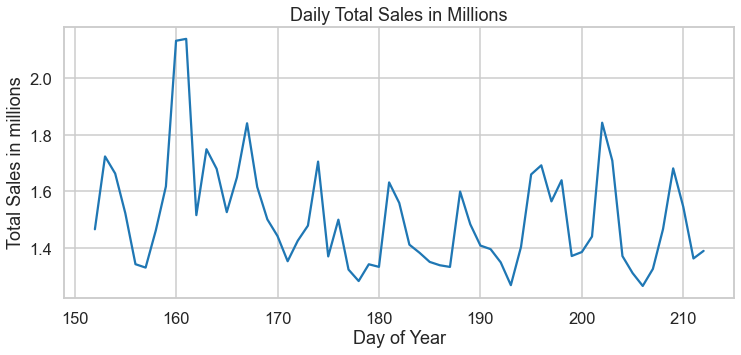

In [16]:
# Зависимость продаж от дня года
days_amount = data\
            .groupby('day',as_index = False)\
            .agg({'amount':'sum','cash':'sum'})\
            .rename(columns = {'amount':'Total Sales in millions','day':'Day of Year'})

days_amount['Total Sales in millions'] = days_amount['Total Sales in millions'] / 1000000


plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'Day of Year', y = 'Total Sales in millions', data = days_amount)
ax.set_title('Daily Total Sales in Millions')

На графике не наблюдается тренд (короткий временной промежуток), ярко выраженная
сезонность (день недели сильно влияет на продажи). Проверим, сохранится ли характер явлений,
если посмотреть на зависимость продаж от дня года в разрезе станций.

Text(0, 0.5, 'Total Sales')

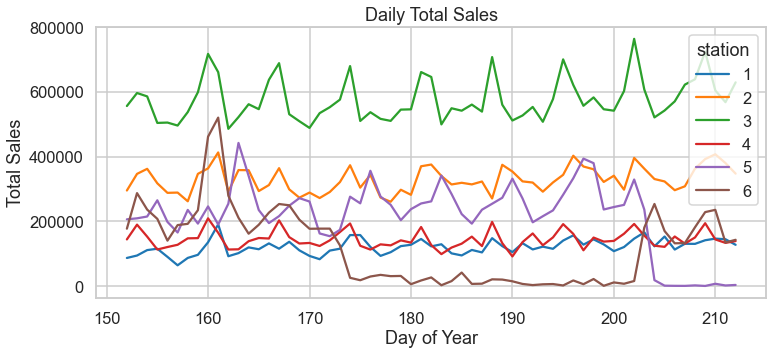

In [17]:
# Зависимость продаж от дня года и станции

days_amount_state = data\
            .groupby(['day','station'],as_index = [False,False])\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total sales'})

plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'day', y = 'Total sales', data = days_amount_state, hue = 'station')
ax.set_title('Daily Total Sales')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Total Sales')

График подтверждает гипотезу. Можно заметить следующие дополнительные факты:
* Уровень продаж разнится для станций.
* На станции под номером 6 продажи резко падают после 172 дня и возобновляются на
202 дне.
* На станции под номером 5 продажи уменьшаются в 202 день. 

Text(0, 0.5, 'Total Transactions')

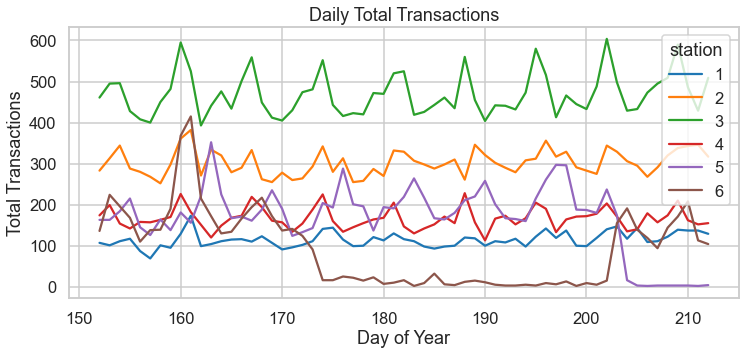

In [18]:
# Количество транзакций в зависимости от дня года и станции
days_visits_state = data\
                        .drop_duplicates('id_trans')\
                        .groupby(['day','station'], as_index = [False,False])\
                        .agg({'id_trans':'count'})\
                        .rename(columns = {'id_trans':'visits'})

plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'day', y = 'visits', data = days_visits_state, hue = 'station')
ax.set_title('Daily Total Transactions')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Total Transactions')

Text(0, 0.5, 'Total Sales')

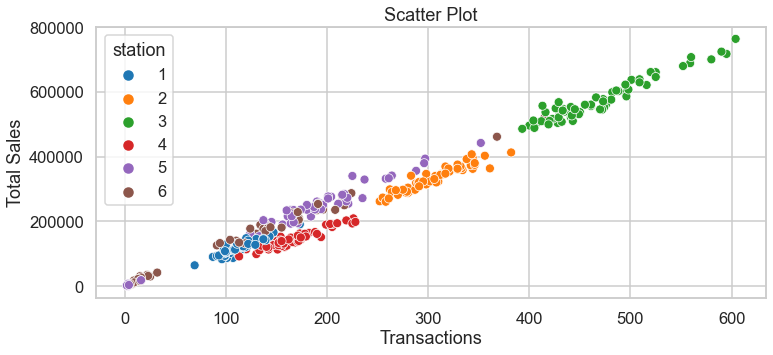

In [19]:
days_visits_amount_state = days_visits_state.merge(days_amount_state, on = ['day','station'])

plt.figure(figsize = (12,5))
ax = sns.scatterplot(x = 'visits', y = 'Total sales', hue = 'station', data = days_visits_amount_state)
ax.set_title('Scatter Plot')
ax.set_xlabel('Transactions')
ax.set_ylabel('Total Sales')

Наблюдается прямая корреляция между продажами и количеством транзакций,

Скорее всего продажи по станциям разнятся по следующим причинам:
* Местоположение -> Различная посещаемость со стороны клиентов
* Количество уникальных сопутствующих товаров -> Различный ассортимент

Абсолютные значения хорошо демонстрируют то, какой доход получает компания со станции.
Но также полезно будет узнать информацию о среднем чеке. В какой-то степени это оценка
эффективности, как хорошо себя реализует станция при своих ресурсах; в нашем случае будем
считать, что ресурсы = посещаемость.

Text(0.5, 0, 'Day of Year')

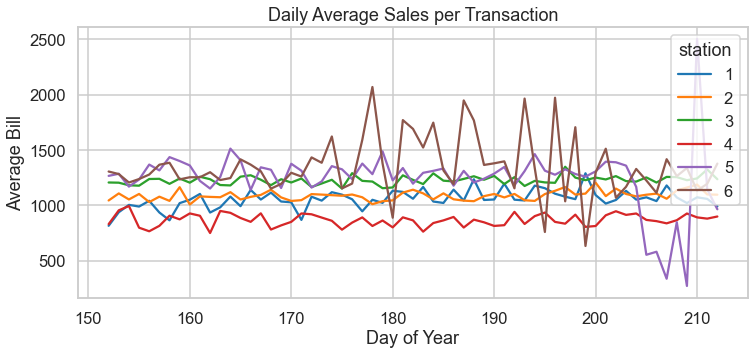

In [20]:
# Средние продажи в зависимости от дня года и станции

days_amount_mean_state = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['day','station'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'day', y = 'Mean Sales', data = days_amount_mean_state, hue = 'station')
ax.set_title('Daily Average Sales per Transaction')
ax.set_ylabel('Average Bill')
ax.set_xlabel('Day of Year')

Как мы видим, ситуация немного изменилась.

Большие скачки среднего чека у станций под номер 5 и 6 вызваны тем, что в период скачков
количество транзакций резко упало (подтверждает график 3), следовательно сглаживающий
эффект от других транзакций уменьшается и аномальные транзакции с большим чеком могут
сильно повлиять на средний чек (если распределение чеков сильно скошено, полезно использовать
медианное значение для оценки среднего).

На поведение клиентов также влияет их статус участия в программе лояльности. (Будем считать,
что тип карты = уровень участия: Green, Gold, Platinum}).

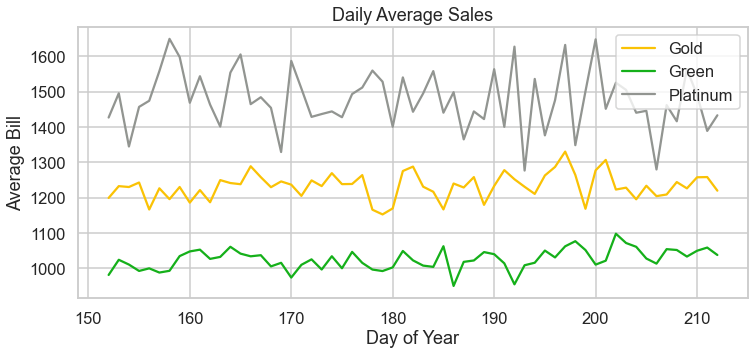

In [21]:
# Зависимость продаж от дня года и типа карты лояльности

days_amount_mean_card = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['day','card_type'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'day', y = 'Mean Sales', data = days_amount_mean_card, hue = 'card_type',palette = ["xkcd:goldenrod", "xkcd:green", "xkcd:gray"])
ax.set_title('Daily Average Sales')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Average Bill')
plt.legend(loc='upper right')


Клиенты со статусом участия Green опережают других по покупкам, так как их больше. Такой
вывод можно сделать исходя из предположения о прямой зависимости между количеством
транзакций и продажами (график 4) и графика 7, также в следующих пунктах данный факт будет
доказан

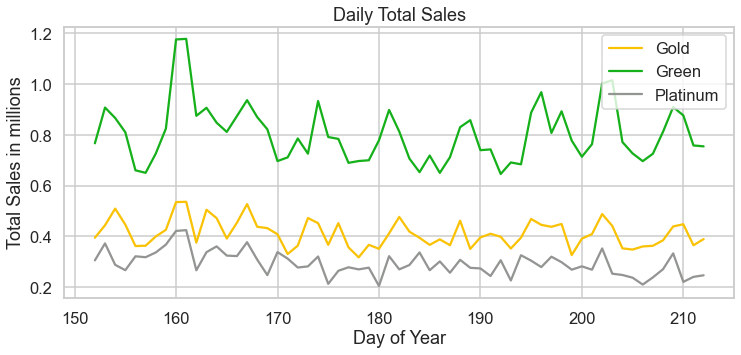

In [23]:
# Зависимость продаж от дня года и статуса участия

days_amount_state = data\
            .groupby(['day','card_type'],as_index = [False,False])\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount': 'Total sales'})

days_amount_state['Total sales'] = days_amount_state['Total sales']/1000000
plt.figure(figsize = (12,5))
ax = sns.lineplot(x = 'day', y = 'Total sales', data = days_amount_state, hue = 'card_type',palette = ["xkcd:goldenrod", "xkcd:green", "xkcd:gray"])
ax.set_title('Daily Total Sales')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Total Sales in millions')
plt.legend(loc='upper right')


Средний чек у клиентов со статусом участия Platinum больше, чем у остальных. Гипотеза: Статус
участия напрямую связан с тем, какое количество литров в среднем заливает клиент.
На всех графиках наблюдается периодичность. Причины может быть две: день недели и
непостоянная цена на топливо.

### 3.2 День недели

Text(0, 0.5, 'Total Sales in Millions')

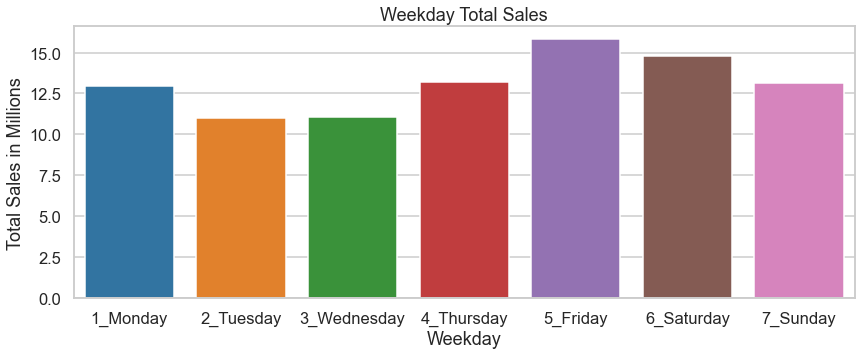

In [24]:
# Зависимость продаж от дня недели
weekday_amount = data\
            .groupby('weekday',as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total sales'})
weekday_amount['Total sales'] =weekday_amount['Total sales']/1000000

plt.figure(figsize = (14,5))
ax = sns.barplot(x = 'weekday', y = 'Total sales', data = weekday_amount)
ax.set_title('Weekday Total Sales')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Sales in Millions')

День недели влияет на количество транзакций, следовательно и на продажи.
В понедельник и пятницу наблюдается пик посещений заправочных станций, в середине
недели и концу выходных просадка.

Text(0, 0.5, 'Total Transactions')

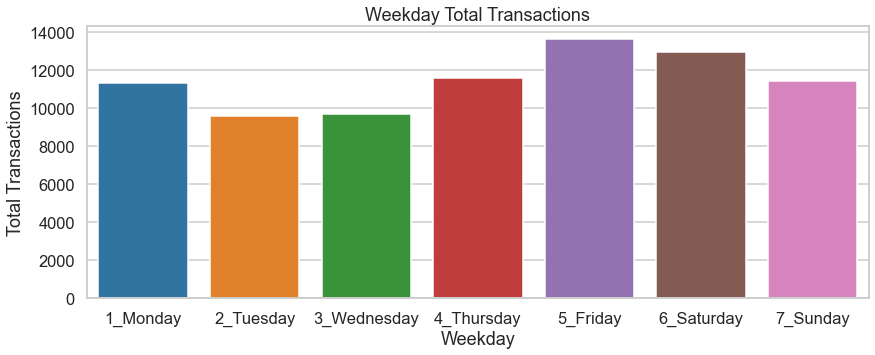

In [25]:
# Количество посещений в зависимости от дня недели
weekdays_visits = data\
                        .drop_duplicates('id_trans')\
                        .groupby('weekday', as_index = False)\
                        .agg({'id_trans':'count'})\
                        .rename(columns = {'id_trans':'visits'})

plt.figure(figsize = (14,5))
ax = sns.barplot(x = 'weekday', y = 'visits', data = weekdays_visits)
ax.set_title('Weekday Total Transactions')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Transactions')

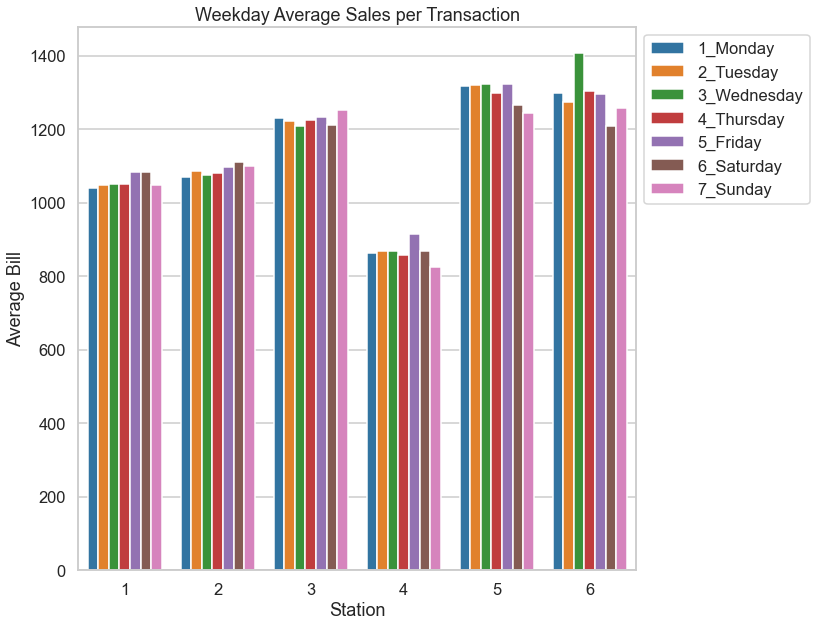

In [26]:
#Количество посещений в зависимости от дня недели и станции
weekday_amount_mean_state = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['weekday','station'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'station', y = 'Mean Sales', data = weekday_amount_mean_state, hue = 'weekday')
ax.set_title('Weekday Average Sales per Transaction')
ax.set_xlabel('Station')
ax.set_ylabel('Average Bill')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 


Средний чек меняется в зависимости от дня недели, также распределение разнится в
зависимости от станции. Выделяется станция под номером 6 – в среду средний чек наибольший.
Отстает от всех станция 4. 

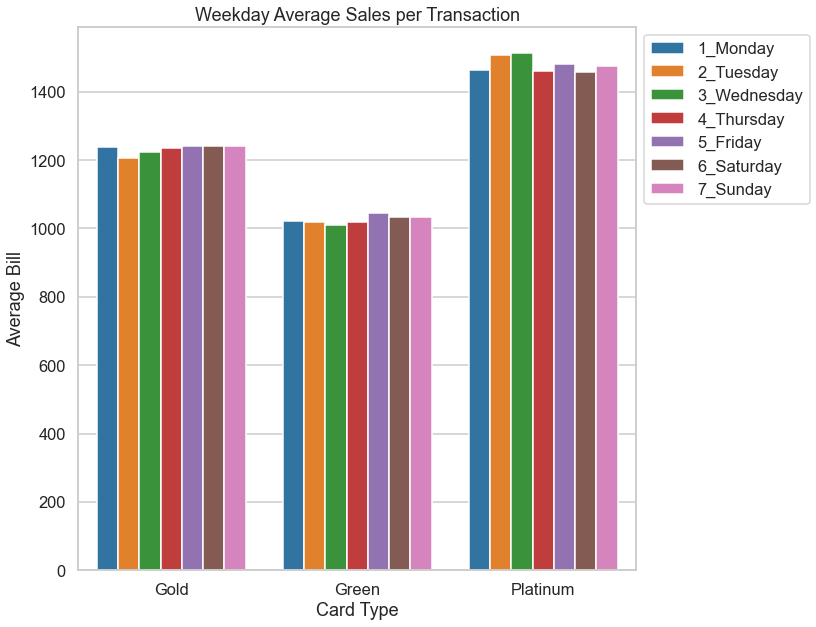

In [27]:
# Средние продажи в зависимости от дня недели и типа карты лояльности
weekday_amount_mean_card = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['weekday','card_type'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'card_type', y = 'Mean Sales', data = weekday_amount_mean_card, hue = 'weekday')
ax.set_title('Weekday Average Sales per Transaction')
ax.set_xlabel('Card Type')
ax.set_ylabel('Average Bill')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

На графике можно наблюдать, что распределение среднего чека для владельцев Gold и
Green карты почти не отличаются. Выделяется распределение среднего чека для владельцев
платиновой карты, во вторник и среду средний чек больше, чем в остальные дни, характер
динамики отличен от других.

### 3.3 Месяц

Text(0, 0.5, 'Total Sales in millions')

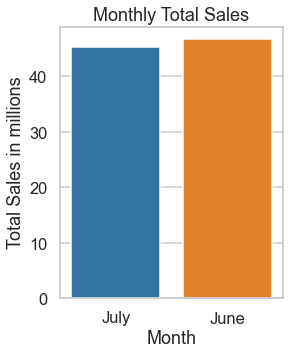

In [28]:
# Продажи по месяцам.
month_amount = data\
            .groupby('month',as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total sales'})
month_amount['Total sales'] = month_amount['Total sales']/1000000

plt.figure(figsize = (4,5))
ax = sns.barplot(x = 'month', y = 'Total sales', data = month_amount)
ax.set_title('Monthly Total Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales in millions')
 

В Июне доход на 1 миллион больше, чем в Июле несмотря на то, что в Июне 30 дней, а в Июле 31. График 2 позволяет объяснить данный факт: с конца июня продажи на станции под номером 6 сильно сократились, станцию 5 в конце июля ожидала идентичная тенденция.

In [29]:
month_amount['Total sales']

0    45.325124
1    46.679636
Name: Total sales, dtype: float64

In [30]:
# Средние продажи по месяцам в миллионах
data\
            .groupby('month',as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total sales'})\
            .apply(lambda x: x['Total sales'] / 31 if x['month'] == 'July' else x['Total sales'] / 30, axis = 1) / 1000000


0    1.462101
1    1.555988
dtype: float64

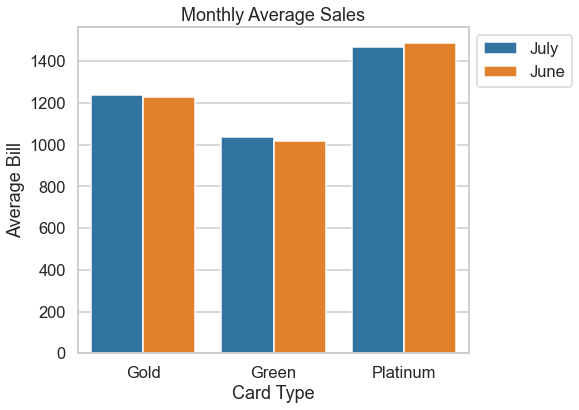

In [31]:
# Средние продажи в зависимости от дня недели и типа карты лояльности
month_amount_mean_card = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['month','card_type'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (7,6))
ax = sns.barplot(x = 'card_type', y = 'Mean Sales', data = month_amount_mean_card, hue = 'month')
ax.set_title('Monthly Average Sales')
ax.set_xlabel('Card Type')
ax.set_ylabel('Average Bill')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 


Средний чек для клиентов с картой Gold & Green увеличился в Июле. Для владельцев
Платиновой карты средний чек уменьшился. Все изменения незначительны, два периода Июнь и
Июль достаточно схожи.


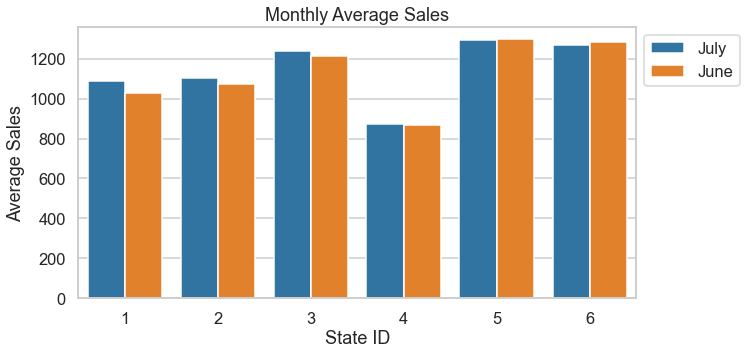

In [32]:
# Средние продажи (посещение) в зависимости от дня недели и типа станции
month_amount_mean_state = data\
                            .drop_duplicates('id_trans')\
                            .merge(data.groupby('id_trans', as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'trans_amount'}), how = 'left', on = 'id_trans')\
                            .groupby(['month','station'],as_index = False)\
                            .agg({'trans_amount' : 'mean'})\
                            .rename(columns = {'trans_amount':'Mean Sales'})

plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'station', y = 'Mean Sales', data = month_amount_mean_state, hue = 'month')
ax.set_title('Monthly Average Sales')
ax.set_xlabel('State ID')
ax.set_ylabel('Average Sales')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

## 4. Анализ карт лояльностей

### 4.1 Соотношение клиентов по картам лояльности

In [33]:
data\
    .drop_duplicates('id_client')\
    .card_type\
    .value_counts(normalize = True)\
    .round(2)

Green       0.74
Gold        0.18
Platinum    0.09
Name: card_type, dtype: float64

In [34]:
data\
    .drop_duplicates('id_client')\
    .card_type\
    .value_counts()\
    .round(2)

Green       16185
Gold         3894
Platinum     1889
Name: card_type, dtype: int64

Клиентов со статусом Green 74%, следовательно
они приносят больше продаж. Но средний чек у клиентов со статусом участия Platinum выше.

### 4.2 Продажи в зависимости от карты лояльности

In [35]:
client_card_type = data\
                    .groupby('card_type', as_index = False)\
                    .agg({'amount':'sum'})\
                    .rename(columns = {'amount':'Total sales mill'})

client_card_type['Total sales mill'] = np.round(client_card_type['Total sales mill']/1000000,2)

In [36]:
# Доход 
revenue_card= data\
                .drop_duplicates('id_trans')\
                .groupby('card_type', as_index = False)\
                .agg({'cash':'sum'})\
                .rename(columns = {'cash':'Total Revenue mill'})
revenue_card['Total Revenue mill'] = np.round(revenue_card['Total Revenue mill']/1000000,2)

client_card_type = client_card_type.merge(revenue_card, on = 'card_type')

In [37]:
# Списание баллов
minus_points_card= data\
                .groupby('card_type', as_index = False)\
                .agg({'minus_points':'sum'})\
                .rename(columns = {'minus_points':'Total Minus Points in mill'})
minus_points_card['Total Minus Points in mill'] = np.round(minus_points_card['Total Minus Points in mill']/1000000,2)

client_card_type = client_card_type.merge(minus_points_card, on = 'card_type')

In [38]:
# Пополнение баллов
plus_points_card= data\
                .groupby('card_type', as_index = False)\
                .agg({'plus_points':'sum'})\
                .rename(columns = {'plus_points':'Total Plus Points in mill'})
plus_points_card['Total Plus Points in mill'] = np.round(plus_points_card['Total Plus Points in mill']/1000000,2)

client_card_type = client_card_type.merge(plus_points_card, on = 'card_type')

In [39]:
# Количество клиентов
client_card_type['Num Clients'] = [3894, 16185, 1889]

In [40]:
# Количество транзакций в зависимости от карты лояльностей
client_card_type = client_card_type.merge(data\
                        .drop_duplicates('id_trans')\
                        .groupby('card_type', as_index = False)\
                        .agg({'id_trans':'count'})\
                        .rename(columns = {'id_trans':'Num Trans'})\
                        ,on = 'card_type')

In [41]:
# Средние продажи за транзакцию
client_card_type['Avg Sales Trans'] = client_card_type.apply(lambda x: np.round(x['Total sales mill']*1000000 / x['Num Trans'],2), axis = 1)

In [42]:
# Средний доход за транзакцию
client_card_type['Avg Revenue Trans'] = client_card_type.apply(lambda x: np.round(x['Total Revenue mill']*1000000 / x['Num Trans'],2), axis = 1)

In [43]:
client_card_type = client_card_type.sort_values('Total sales mill')

In [44]:
client_card_type

,card_type,Total sales mill,Total Revenue mill,Total Minus Points in mill,Total Plus Points in mill,Num Clients,Num Trans,Avg Sales Trans,Avg Revenue Trans
2,Platinum,17.86,17.46,0.41,0.57,1889,12081,1478.35,1445.24
0,Gold,25.13,24.81,0.33,0.56,3894,20377,1233.25,1217.55
1,Green,49.01,48.82,0.19,0.65,16185,47705,1027.36,1023.37


In [45]:
client_card_type['Avg Plus Points'] = (client_card_type['Total Plus Points in mill'] / client_card_type['Num Trans'])*1000000
client_card_type['Avg Minus Points'] = (client_card_type['Total Minus Points in mill'] / client_card_type['Num Trans'])*1000000

In [46]:
Total_client = client_card_type[['card_type',
                                 'Total sales mill', 
                                'Total Revenue mill', 
                                'Total Minus Points in mill',
                                'Total Plus Points in mill',
                                'Num Clients',
                                'Num Trans']]

In [47]:
Avg_client = client_card_type[['card_type',
                               'Avg Sales Trans',
                               'Avg Revenue Trans',
                               'Avg Plus Points',
                               'Avg Minus Points',
                               'Num Clients',
                               'Num Trans']]

In [50]:
Total_client.to_csv('Total_client.csv',sep = ';', encoding = "cp1251")

In [51]:
Avg_client.to_csv('Avg_client.csv',sep = ';', encoding = "cp1251")

In [52]:
Avg_client

,card_type,Avg Sales Trans,Avg Revenue Trans,Avg Plus Points,Avg Minus Points,Num Clients,Num Trans
2,Platinum,1478.35,1445.24,47.181525,33.937588,1889,12081
0,Gold,1233.25,1217.55,27.481965,16.194729,3894,20377
1,Green,1027.36,1023.37,13.625406,3.982811,16185,47705


In [54]:
Total_client

,card_type,Total sales mill,Total Revenue mill,Total Minus Points in mill,Total Plus Points in mill,Num Clients,Num Trans
2,Platinum,17.86,17.46,0.41,0.57,1889,12081
0,Gold,25.13,24.81,0.33,0.56,3894,20377
1,Green,49.01,48.82,0.19,0.65,16185,47705


* Распределение долей дохода и продаж от совокупных продаж и дохода в зависимости от статуса участия, почти не отличается. Разница в 1 процент для Platinum и Green.
* Не смотрят на то, что процент клиентов со статусом Green = 74 %, на них приходится 54% дохода.
* Клиентов со статусом Platinum = 9 %, доля дохода = 19 %.
* Три группы в абсолютных значениях накопили примерно одинаковое количество баллов.
* Участники со статусом Platinum эффективнее остальных реализуют накопленные баллы.
* Последние четыре пункта связаны с причинами, которые накладываются друг на друга:
     * Посещаемость и количество транзакций в среднем на одного клиента у трех групп различная.
            * Platinum: В среднем 6.4 транзакций на одного клиента.
            * Gold: В среднем 5.2 транзакций на одного клиента.
            * Green: В среднем 2.9 транзакций на одного клиента.
     * Разный средний чек.
            * Platinum: 1445 руб
            * Gold: 1217 руб.
            * Green: 1023 руб.
     * Следовательно:
            * Чем больше средний чек у группы -> Доля дохода, приходящегося на группу, при прочих равных (например, количество клиентов и транзакций) растет.
            * С ростом частоты посещаемости у группы, растет доля приходящего дохода и повышается эффективность реализации баллов. 

### 4.3 Затраты на Сопутку и Топливо

In [55]:
# Total sales
client_card_type_2 = data\
                    .groupby('card_type', as_index = False)\
                    .agg({'amount':'sum'})\
                    .rename(columns = {'amount':'Total sales mill'})

client_card_type_2['Total sales mill'] = np.round(client_card_type_2['Total sales mill']/1000000,2)

In [56]:
# Toplivo sales
toplivo_card_type = data\
                    .query('product_type == "Топливо"')\
                    .groupby('card_type', as_index = False)\
                    .agg({'amount':'sum'})\
                    .rename(columns = {'amount':'Fuel Sales %'})

toplivo_card_type['Fuel Sales %'] = np.round(toplivo_card_type['Fuel Sales %']/1000000,2)

client_card_type_2 = client_card_type_2.merge(toplivo_card_type, on = 'card_type')
client_card_type_2['Fuel Sales %'] = np.round((client_card_type_2['Fuel Sales %'] / client_card_type_2['Total sales mill'])*100,3)

In [57]:
# Soputka sales
soputka_card_type = data\
                    .query('product_type == "СОПУТКА"')\
                    .groupby('card_type', as_index = False)\
                    .agg({'amount':'sum'})\
                    .rename(columns = {'amount':'Soputka Sales %'})

soputka_card_type['Soputka Sales %'] = np.round(soputka_card_type['Soputka Sales %']/1000000,2)

client_card_type_2 = client_card_type_2.merge(soputka_card_type, on = 'card_type')
client_card_type_2['Soputka Sales %'] = np.round((client_card_type_2['Soputka Sales %'] / client_card_type_2['Total sales mill'])*100,3)

In [58]:
client_card_type_2.sort_values('Total sales mill').to_csv('fuel_sop.csv', sep = ';', encoding = "cp1251")

In [59]:
state_product_client = data\
                        .groupby(['card_type','product_type','station'], as_index = False)\
                        .agg({'amount':'sum'})\
                        .rename(columns = {'amount':'Fuel Sales %'})\
                        .merge(data.groupby(['card_type','station'], as_index = False).agg({'amount':'sum'}).rename(columns = {'amount':'Total sales mill'}), on = ['station','card_type'],how = 'left')


In [60]:
state_product_client['Sales %'] = np.round((state_product_client['Fuel Sales %']/state_product_client['Total sales mill'])*100,2)
state_product_client.drop(['Fuel Sales %','Total sales mill'], axis = 1, inplace = True)

In [61]:
state_product_client = state_product_client.pivot(index = ['card_type','product_type'], columns = 'station', values = 'Sales %')

In [62]:
state_product_client.sort_values('card_type', ascending = False).to_excel('state_product.xlsx', encoding = "cp1251")

In [63]:
state_product_client.sort_values('card_type', ascending = False)

station                     1      2      3      4      5      6
card_type product_type                                          
Platinum  СОПУТКА        5.25   3.68   4.28   3.52   8.55   9.94
          Топливо       94.75  96.32  95.72  96.48  91.45  90.06
Green     СОПУТКА        5.61   4.57   2.53   3.03  10.52  10.69
          Топливо       94.39  95.43  97.47  96.97  89.48  89.31
Gold      СОПУТКА        4.34   3.44   2.78   2.66   8.91  10.00
          Топливо       95.66  96.56  97.22  97.34  91.09  90.00

### 4.4 Топливо

#### 4.4.1 Продажи

In [64]:
# Топливо в продажах
toplivo = data\
            .query('product_type == "Топливо"')\
            .groupby('product', as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total Sales in mill'})
toplivo['Total Sales in mill'] = np.round((toplivo['Total Sales in mill'] / 1000000),2)
toplivo.sort_values('Total Sales in mill', ascending = False).to_excel('toplivo.xlsx', encoding = "cp1251")

In [65]:
# Топливо в продажах в зависимости от карты лояльности. Абсолютные значения
toplivo_card = data\
            .query('product_type == "Топливо"')\
            .groupby(['card_type','product'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total Sales in mill'})

toplivo_card['Total Sales in mill'] = np.round((toplivo_card['Total Sales in mill'] / 1000000),2)
toplivo_card.sort_values('Total Sales in mill', ascending = False, inplace = True)

toplivo_card_pivot = toplivo_card.pivot(index = 'card_type',columns = 'product',values = 'Total Sales in mill')
toplivo_card_pivot.sort_values('АИ-92', ascending = False, inplace = True)

toplivo_card_pivot

product,АИ-92,АИ-95,АИ-95 Ult,АИ-98 Ult,ДТ,ДТ Ult
card_type,,,,,,
Green,14.05,17.59,6.62,1.27,1.63,5.36
Gold,6.12,8.89,3.91,0.81,0.59,3.73
Platinum,3.31,4.52,2.23,0.52,1.27,5.03


In [66]:
# Топливо в продажах в зависимости от карты лояльности. В процентах

toplivo_card_card = toplivo_card.merge(toplivo_card.groupby('card_type', as_index = False).agg({'Total Sales in mill':'sum'}).rename(columns = {'Total Sales in mill':'Total'}),
                          how = 'left',
                          on = 'card_type')
                                            
toplivo_card_card['Total Sales in mill'] = (toplivo_card_card['Total Sales in mill']/toplivo_card_card['Total']).round(3)*100   

toplivo_card_card_pivot = toplivo_card_card.pivot(index = 'card_type', columns = 'product', values = 'Total Sales in mill')


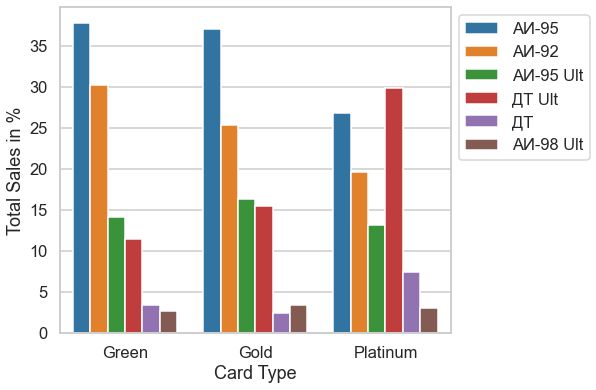

In [67]:
plt.figure(figsize = (7,6))
ax = sns.barplot(x = 'card_type',
                 y = 'Total Sales in mill',
                 hue = 'product',
                 data = toplivo_card_card)

ax.set_xlabel('Card Type')
ax.set_ylabel('Total Sales in %')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [68]:
toplivo_card_card_pivot

product,АИ-92,АИ-95,АИ-95 Ult,АИ-98 Ult,ДТ,ДТ Ult
card_type,,,,,,
Gold,25.4,37.0,16.3,3.4,2.5,15.5
Green,30.2,37.8,14.2,2.7,3.5,11.5
Platinum,19.6,26.8,13.2,3.1,7.5,29.8


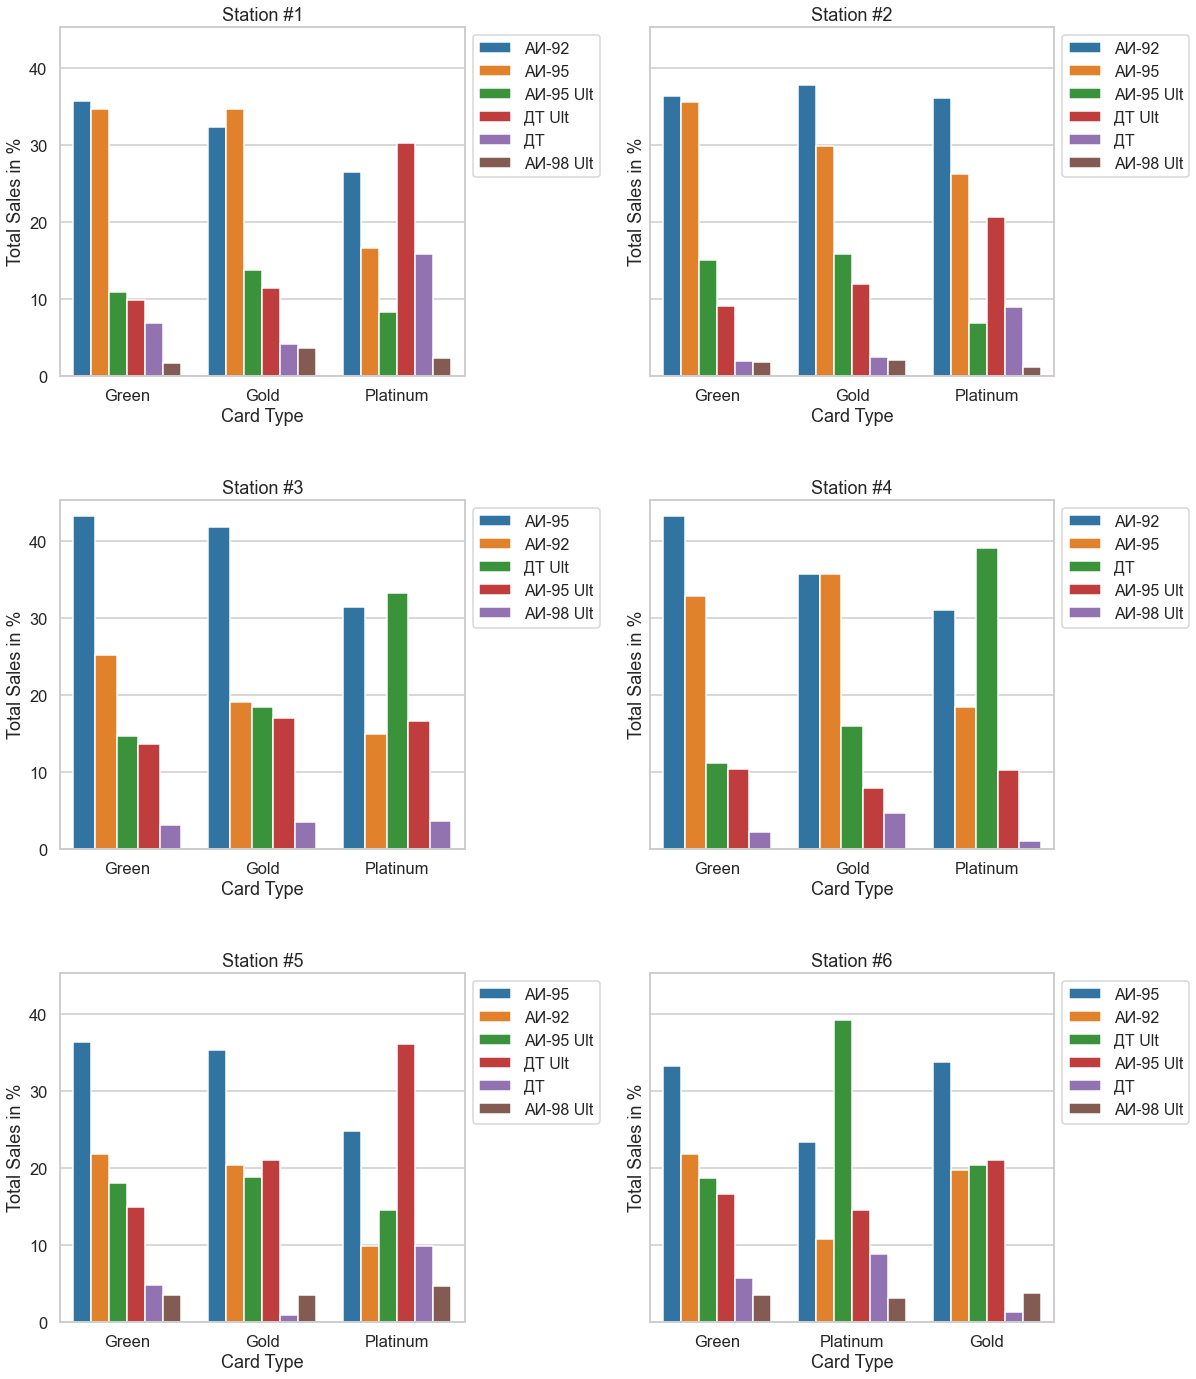

In [69]:
# Топливо в продажах в зависимости от карты лояльности и станции (проценты)
fig, axes = plt.subplots(3,2, figsize=(15,19), sharey=True)
fig.tight_layout(h_pad=5, w_pad=9)

for i in range(6):
    k = str(i + 1)
    toplivo_card_1 = data\
            .query('product_type == "Топливо" & station == @k')\
            .groupby(['card_type','product'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'Total Sales in mill'})
    toplivo_card_1['Total Sales in mill'] = np.round((toplivo_card_1['Total Sales in mill'] / 1000000),2)
    toplivo_card_1.sort_values('Total Sales in mill', ascending = False, inplace = True)
    toplivo_card_card_1 = toplivo_card_1.merge(toplivo_card_1.groupby('card_type', as_index = False).agg({'Total Sales in mill':'sum'}).rename(columns = {'Total Sales in mill':'Total'}),
                                           how = 'left',
                                           on = 'card_type')
                                            
    toplivo_card_card_1['Total Sales in mill'] = (toplivo_card_card_1['Total Sales in mill']/toplivo_card_card_1['Total']).round(3)*100 
    
    sns.barplot(x = 'card_type', y = 'Total Sales in mill', hue = 'product', data = toplivo_card_card_1, ax = axes[i // 2, i % 2 ])
    axes[i // 2, i % 2].set_title(f'Station #{k}')
    axes[i // 2, i % 2].set_xlabel('Card Type')
    axes[i // 2, i % 2].set_ylabel('Total Sales in %')   
    axes[i // 2, i % 2].legend(bbox_to_anchor=(1, 1), loc=2, fontsize = 16)
    


* На станциях 1, 2, 5 и 6 продаются все виды топлива
* На станциях 3 и 4 отсутствуют ДТ и ДТ Ult соответственно
* Не смотрят на то, что на станциях 3 и 4 отсутствует по одному виду топлива. Станция под номером 4 отстает от остальных по продажам в отличии от станции 3, которая держится в топе, как по доходу, так и по среднему чеку. Это связано с тем, что среди клиентов наиболее популярен ДТ-Ult ( #3 в рейтинге по продажам, таблица 8), который отсутствует на станции 4. На станции 3 отсутствует непопулярное топливо ДТ, поэтому на продажи это никак не сказалось
* Клиенты предпочитают ДТ – Ult, а не ДТ, но можно заметить следующий факт, т.к. на станции 4 отсутствует ДТ – Ult клиенты заливают топливо ДТ (замена ДТ – Ult).
* На станции 2 крайне непопулярно дизельное топливо (выбивается из общей картины), возможно это связано с районом, в котором находится автозаправочная станция. Жилой район, где вероятность встретить крупногабаритную машину (зачастую такие заправляются дизелем), низка по сравнению со среднестатистическими областями города.
* На станциях 3, 5, 6 Green & Gold предпочитают АИ-95 с большим отрывом от остальных. На станциях 1, 2, 4 АИ-95 держится на равных с АИ-92.
* АИ-95 Ult и АИ-98 Ult отстают по продажам, так как цена на них выше, чем на альтернативу – заменитель АИ-92 и АИ-95, которая ничем не хуже.
* ДТ–Ult качественнее ДТ, при том, что цена почти не отличается, следовательно ДТ-Ult предпочтительнее.

In [70]:
# Предпочтение заправок в разрезе карт и станций, абсолютные значения
visits_card_station = data\
                        .drop_duplicates('id_trans')\
                        .groupby(['card_type','station'], as_index = False)\
                        .agg({'id_client':'count'})\

visits_card_station_pivot = visits_card_station.pivot(index = 'card_type',columns = 'station',values = 'id_client')


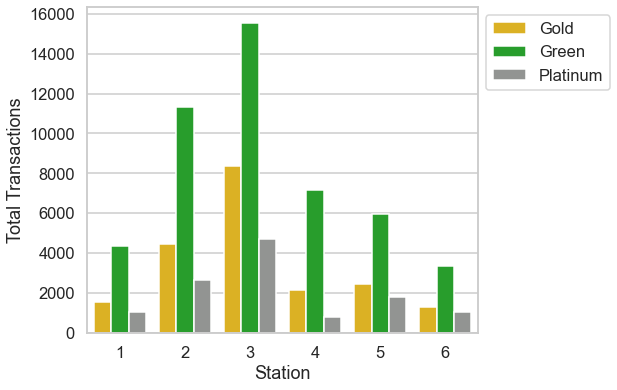

In [71]:
plt.figure(figsize = (7,6))
ax = sns.barplot(x = 'station', y = 'id_client', hue = 'card_type', data = visits_card_station, palette = ["xkcd:goldenrod", "xkcd:green", "xkcd:gray"])
ax.set_xlabel('Station')
ax.set_ylabel('Total Transactions')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [72]:
visits_card_station_pivot

station,1,2,3,4,5,6
card_type,,,,,,
Gold,1591,4471,8360,2189,2451,1315
Green,4348,11320,15546,7151,5966,3374
Platinum,1056,2651,4717,813,1799,1045


In [73]:
# Предпочтение заправок среди в разрезе карт и станций в процентах (карты)

visits_card_station_card = visits_card_station.merge(visits_card_station.groupby('card_type', as_index = False).agg({'id_client':'sum'}).rename(columns = {'id_client':'Total Transactions'}),
                          how = 'left',
                          on = 'card_type')
visits_card_station_card['id_client'] = (visits_card_station_card['id_client']/visits_card_station_card['Total Transactions']).round(3)*100   

visits_card_station_card_pivot = visits_card_station_card.pivot(index = 'card_type', columns = 'station', values = 'id_client')



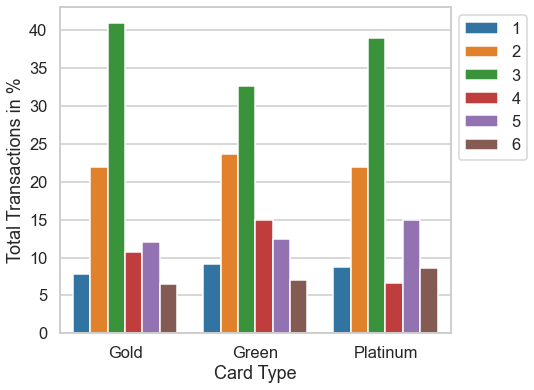

In [74]:
plt.figure(figsize = (7,6))
ax = sns.barplot(x = 'card_type', y = 'id_client', hue = 'station', data = visits_card_station_card)
ax.set_xlabel('Card Type')
ax.set_ylabel('Total Transactions in %')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [75]:
visits_card_station_card_pivot

station,1,2,3,4,5,6
card_type,,,,,,
Gold,7.8,21.9,41.0,10.7,12.0,6.5
Green,9.1,23.7,32.6,15.0,12.5,7.1
Platinum,8.7,21.9,39.0,6.7,14.9,8.6


In [76]:
# Предпочтение заправок среди в разрезе карт и станций в процентах (станции)
visits_card_station_station = visits_card_station.merge(visits_card_station.groupby('station', as_index = False).agg({'id_client':'sum'}).rename(columns = {'id_client':'Total Transactions'}),
                          how = 'left',
                          on = 'station')
visits_card_station_station['id_client'] = (visits_card_station_station['id_client']/visits_card_station_station['Total Transactions']).round(3)*100   

visits_card_station_station_pivot = visits_card_station_station.pivot(index = 'station', columns = 'card_type', values = 'id_client')

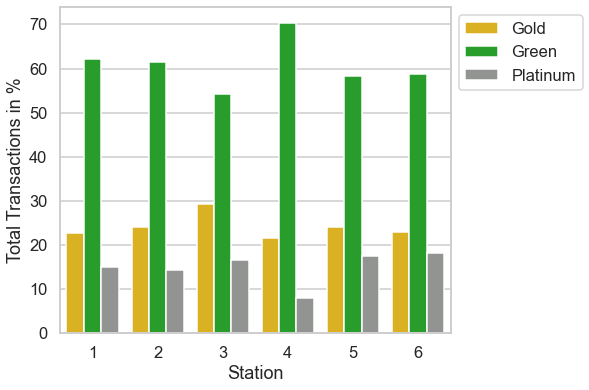

In [77]:
plt.figure(figsize = (7,6))
ax = sns.barplot(x = 'station',
                 y = 'id_client',
                 hue = 'card_type',
                 data = visits_card_station_station,
                 palette = ["xkcd:goldenrod", "xkcd:green", "xkcd:gray"])

ax.set_xlabel('Station')
ax.set_ylabel('Total Transactions in %')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

#### 4.4.3 Литры

* Бокс-плот и распределение литров. анализ
* В разрезе карт
* В разрезе типов топлива

In [78]:
toplivo = data.query('product_type == "Топливо"').copy()
toplivo['count_a'] = toplivo['count'].round().apply(lambda x: int(x))

In [79]:
toplivo_green =  toplivo.query('card_type == "Green"')

Text(0.5, 0, 'Litres')

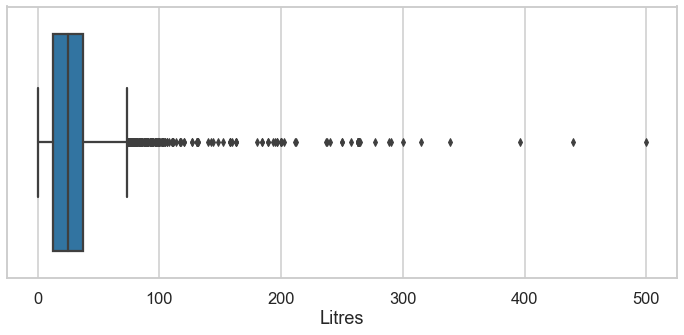

In [80]:
plt.figure(figsize = (12,5))

ax = sns.boxplot(x ='count_a', data = toplivo_green)
ax.set_xlabel('Litres')

In [81]:
toplivo_green = toplivo.query('card_type == "Green"')

Text(0.5, 0, 'Litres')

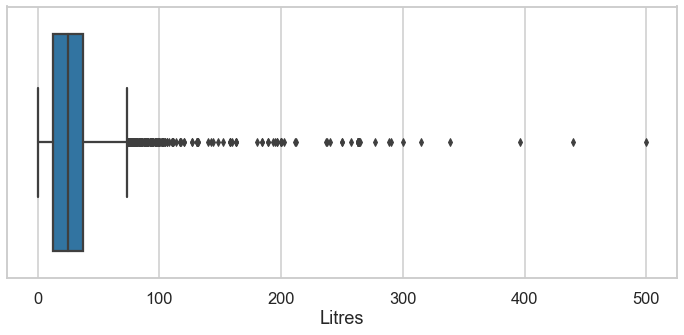

In [82]:
plt.figure(figsize = (12,5))

ax = sns.boxplot(x ='count_a', data = toplivo_green)
ax.set_xlabel('Litres')

In [83]:
toplivo_green['count'].describe()

count    43540.000000
mean        27.219658
std         17.042362
min          0.110000
25%         13.480700
50%         25.000000
75%         36.520000
max        500.000000
Name: count, dtype: float64

In [84]:
toplivo_gold = toplivo.query('card_type == "Gold"')

Text(0.5, 0, 'Litres')

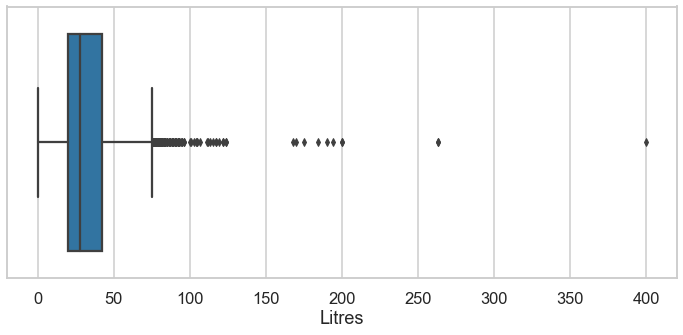

In [85]:
plt.figure(figsize = (12,5))

ax = sns.boxplot(x ='count_a', data = toplivo_gold)
ax.set_xlabel('Litres')

In [86]:
toplivo_gold['count'].describe()

count    19212.000000
mean        31.755734
std         16.722343
min          0.040000
25%         20.000000
50%         27.563300
75%         41.929900
max        400.000000
Name: count, dtype: float64

In [87]:
toplivo_platinum = toplivo.query('card_type == "Platinum"')

Text(0.5, 0, 'Litres')

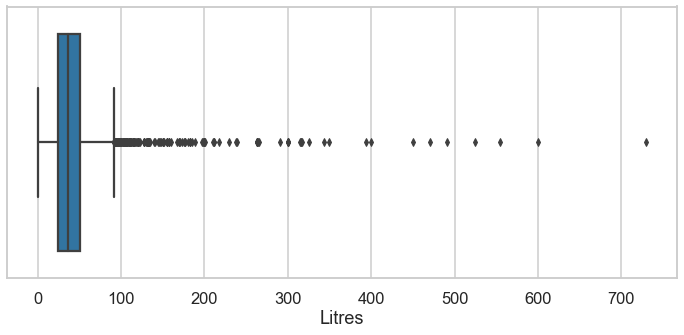

In [88]:
plt.figure(figsize = (12,5))

ax = sns.boxplot(x ='count_a', data = toplivo_platinum)
ax.set_xlabel('Litres')

In [89]:
toplivo_platinum['count'].describe()

count    11129.000000
mean        38.653066
std         28.048837
min          0.050000
25%         24.038400
50%         35.889900
75%         50.699900
max        730.000000
Name: count, dtype: float64

In [94]:
toplivo = toplivo.query('count < 200')

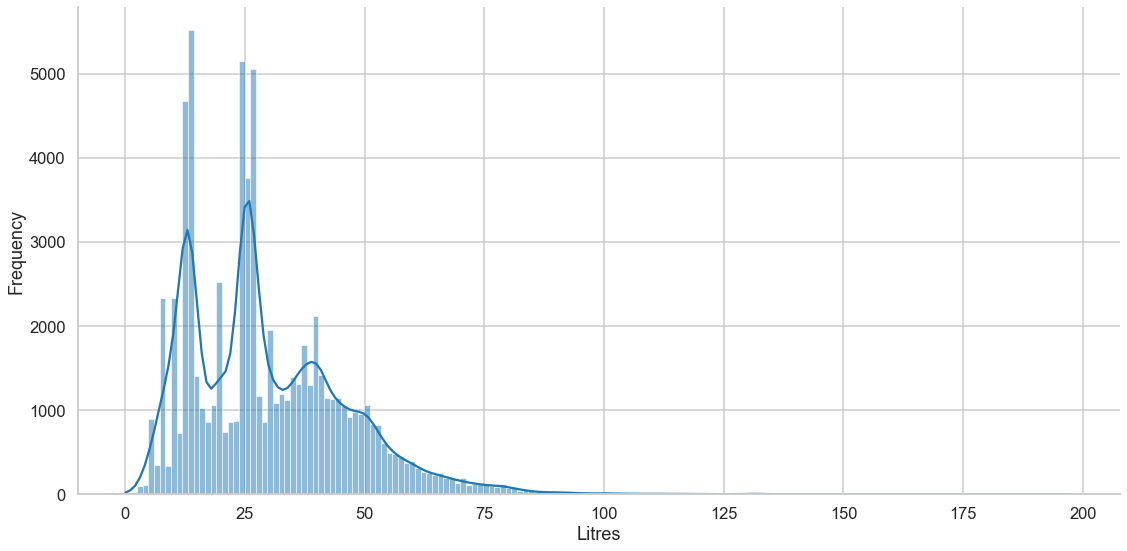

In [95]:
ax = sns.displot(x ='count', kde = True, data = toplivo, height=8, aspect = 2)
ax.set_axis_labels("Litres", "Frequency")

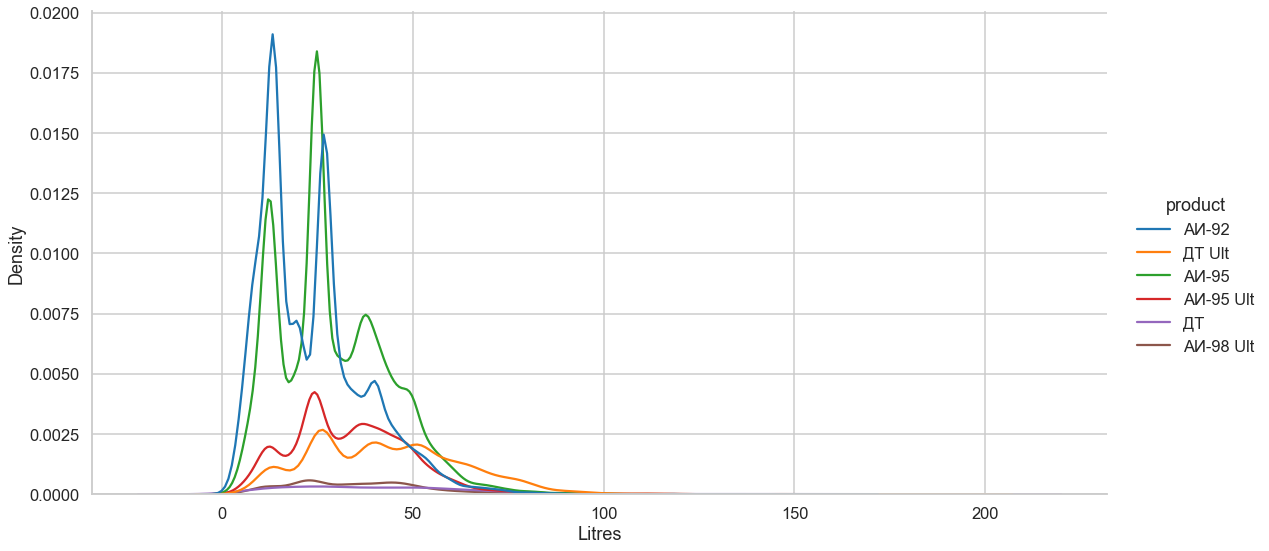

In [96]:
ax = sns.displot(x ='count', kind = 'kde', data = toplivo, height=8, aspect = 2, hue = 'product')
ax.set_axis_labels("Litres", "Density")

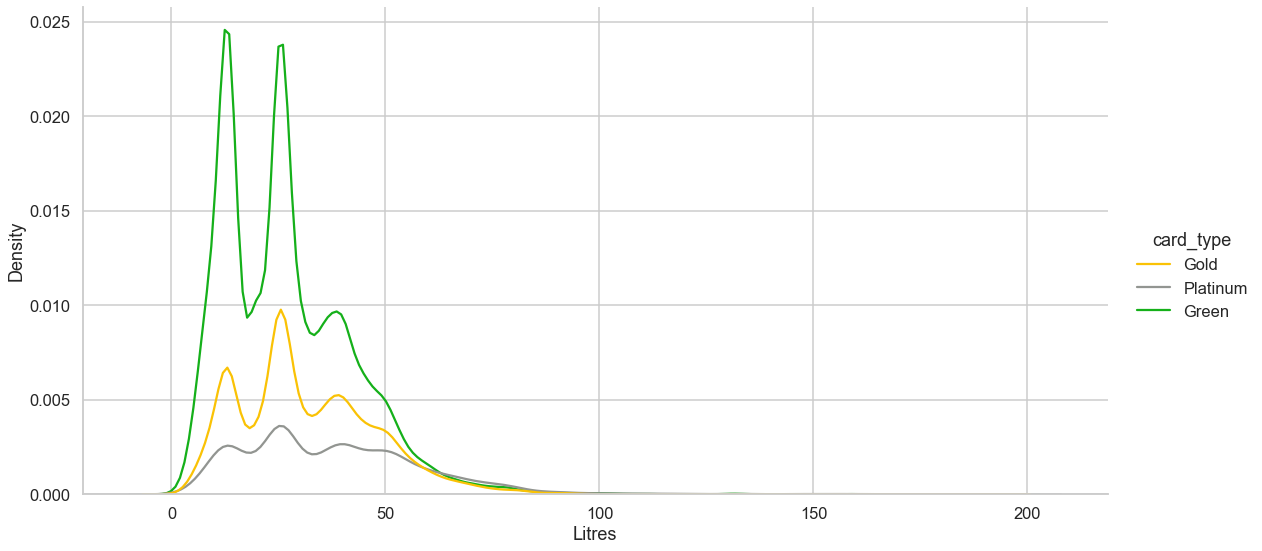

In [97]:
ax = sns.displot(x ='count', kind = 'kde', data = toplivo, height=8, aspect = 2, hue = 'card_type', palette = ["xkcd:goldenrod", "xkcd:gray", "xkcd:green"])
ax.set_axis_labels("Litres", "Density")

In [98]:
# Какое топливо больше всего заливают
data\
.query('product_type == "Топливо"')\
.groupby('product')\
.agg({'count':'sum'})\
.rename(columns = {'count':'Litres'})\
.round(2)\
.sort_values('Litres', ascending = False)

,Litres
product,
АИ-95,772266.43
АИ-92,629881.00
ДТ Ult,364503.58
АИ-95 Ult,308369.01
ДТ,91151.68
АИ-98 Ult,59233.33


In [99]:
# Кто сколько литров заливает в абсолютных значениях
data\
.query('product_type == "Топливо"')\
.groupby(['card_type','product'], as_index = False)\
.agg({'count':'sum'})\
.rename(columns = {'count':'Litres'})\
.round(2)\
.pivot(index = 'card_type', columns = 'product', values = 'Litres')

product,АИ-92,АИ-95,АИ-95 Ult,АИ-98 Ult,ДТ,ДТ Ult
card_type,,,,,,
Gold,164000.01,221477.22,94384.00,18498.03,15316.86,96415.05
Green,377130.46,438261.88,160016.50,28941.29,42573.09,138220.69
Platinum,88750.54,112527.33,53968.51,11794.02,33261.74,129867.84


In [100]:
# Кто сколько литров заливает в процентах
litres = data\
            .query('product_type == "Топливо"')\
            .groupby(['card_type','product'], as_index = False)\
            .agg({'count':'sum'})\
            .rename(columns = {'count':'Litres'})\
            .round(2)\
            .merge(data.query('product_type == "Топливо"').groupby(['card_type'], as_index = False).agg({'count':'sum'}).round(2),
                   how = 'left',
                   on = 'card_type')

litres['Litres'] = np.round((litres['Litres']/litres['count']) * 100,2)
litres.drop('count', axis = 1, inplace = True)

litres_pivot = litres.pivot(index = 'card_type', columns = 'product', values = 'Litres')

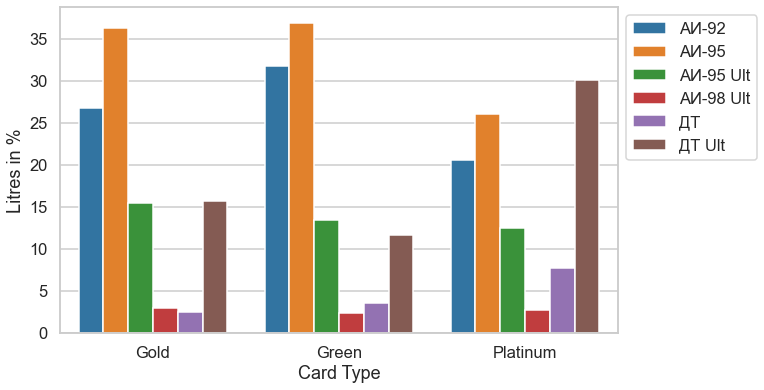

In [101]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'card_type', y = 'Litres', hue = 'product', data = litres)
ax.set_xlabel('Card Type')
ax.set_ylabel('Litres in %')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [102]:
litres_pivot

product,АИ-92,АИ-95,АИ-95 Ult,АИ-98 Ult,ДТ,ДТ Ult
card_type,,,,,,
Gold,26.88,36.30,15.47,3.03,2.51,15.80
Green,31.82,36.98,13.50,2.44,3.59,11.66
Platinum,20.63,26.16,12.55,2.74,7.73,30.19


**Цена на бензин**

In [103]:
data\
.query('product_type == "Топливо"')\
.groupby('product')\
.agg({'price':'mean'})\
.round(2)\
.sort_values('price', ascending = False)

,price
product,
АИ-98 Ult,43.86
АИ-95 Ult,41.35
АИ-95,40.13
ДТ Ult,38.73
ДТ,38.37
АИ-92,37.25


In [104]:
data.head(2)

,id_client,product_type,operation_type,date,count,price,amount,product,cash,plus_points,minus_points,card_type,id_trans,date_start,station,day,month,weekday
0,7005993000019063,Топливо,97,2017-06-29,26.7522,37.38,999.997236,АИ-92,1000.0,20.0,0.0,Gold,228177633,22.01.2017 13:50:34,3,180,June,4_Thursday
1,7005993000019063,Топливо,97,2017-07-03,26.6666,37.50,999.997500,АИ-92,1000.0,20.0,0.0,Gold,231763933,22.01.2017 13:50:34,3,184,July,1_Monday


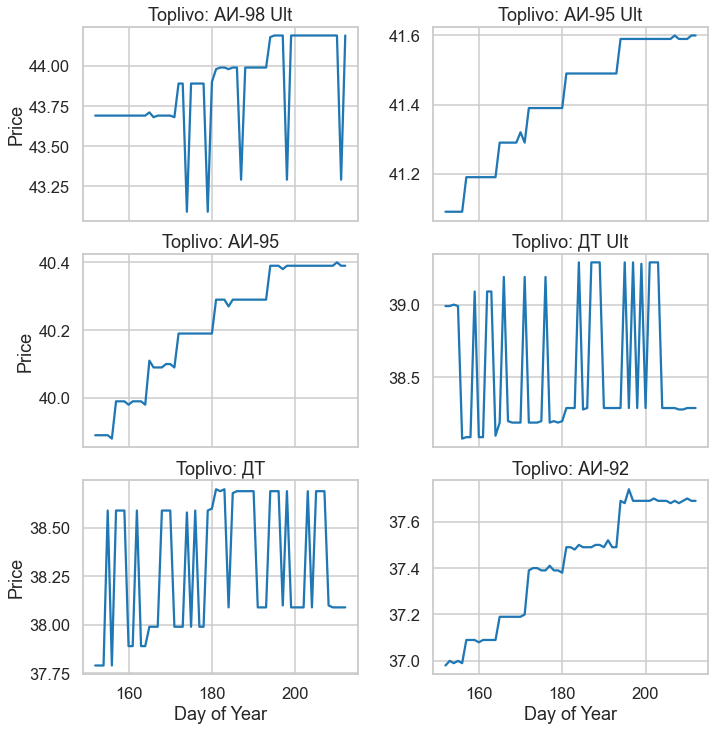

In [105]:
fig, axes = plt.subplots(3,2, figsize=(10,10), sharex = True)
fig.tight_layout(h_pad=1)
l = 0
for i in ['АИ-98 Ult','АИ-95 Ult','АИ-95','ДТ Ult','ДТ','АИ-92']:
    k = i
    price = data\
                .query('product == @k')\
                .drop_duplicates('day')
    
    sns.lineplot(x = 'day', y = 'price',data = price, ax = axes[l//2, l%2])
    axes[l // 2, l % 2].set_title(f'Toplivo: {k}')
    axes[l // 2, l % 2].set_xlabel('Day of Year')
    if l % 2 == 0:
        axes[l // 2, l % 2].set_ylabel('Price')   
    else: 
        axes[l // 2, l % 2].set_ylabel('')
        
    l+= 1

### 4.5 Сопутка

In [106]:
# На всех станциях всего видов сопутствующих товаров
data.query('product_type == "СОПУТКА"')['product'].nunique()

1731

In [107]:
# Количество уникальных сопутствующих товаров в разрезе станций
for i in range(1,7):
    st = str(i)
    nunique = data.query('product_type == "СОПУТКА" & station == @st')['product'].nunique()
    print(st, nunique)


1 667
2 960
3 968
4 569
5 1018
6 905


In [108]:
# Топ 15 по продажам в рублях сопуток
data\
    .query('product_type == "СОПУТКА"')\
    .groupby('product')\
    .agg({'amount':'sum'})\
    .rename(columns = {'amount':'Sales'})\
    .sort_values('Sales', ascending = False)\
    .head(15).to_excel('soputka.xlsx', encoding = "cp1251")

In [110]:
data\
    .query('product_type == "СОПУТКА"')\
    .groupby('product')\
    .agg({'amount':'sum'})\
    .rename(columns = {'amount':'Sales'})\
    .sort_values('Sales', ascending = False)\
    .head(15)

,Sales
product,
КАПУЧИНО 160мл/на вынос,270144.0
АМЕРИКАНО 180мл/на вынос,189585.0
КАПУЧИНО MAXI 320мл/на вынос,179281.0
ДВОЙНОЙ ЭСПРЕССО 160мл/на вынос,83085.0
Латте 180мл/на вынос,74373.0
АКЦИЯ 2 ДАТСКИХ ХОТ-ДОГА с СОСИСКОЙ КНАКЕРС,70965.0
АКЦИЯ 2 ФРАНЦУЗСКИХ ХОТ-ДОГА С СОСИСКОЙ КНАКЕРС,61752.0
ЛАТТЕ МАККИЯТО MAXI 320мл/на вынос,54079.0
Сигареты PARLIAMENT aqua blue,48865.0


In [109]:
# Топ 15 по продажам в рублях сопуток в разреще карт лояльностей

products_top = pd.DataFrame({'Top': np.arange(1,16)})

for i in ['Green','Gold','Platinum']:
    products_top = pd.concat([products_top,data\
                                            .query('product_type == "СОПУТКА" & card_type == @i')\
                                            .groupby('product', as_index = False)\
                                            .agg({'amount':'sum'})\
                                            .rename(columns = {'amount':'Sales','product': i})\
                                            .sort_values('Sales', ascending = False)\
                                            .iloc[:15,:]\
                                            .drop('Sales', axis = 1)\
                                            .reset_index()\
                                            .drop('index', axis = 1)]
                             ,axis = 1)
products_top.set_index('Top').to_excel('soputka_2.xlsx', encoding = "cp1251")

In [111]:
products_top.set_index('Top')

,Green,Gold,Platinum
Top,,,
1,КАПУЧИНО 160мл/на вынос,КАПУЧИНО 160мл/на вынос,КАПУЧИНО 160мл/на вынос
2,АМЕРИКАНО 180мл/на вынос,КАПУЧИНО MAXI 320мл/на вынос,АМЕРИКАНО 180мл/на вынос
3,КАПУЧИНО MAXI 320мл/на вынос,АМЕРИКАНО 180мл/на вынос,КАПУЧИНО MAXI 320мл/на вынос
4,АКЦИЯ 2 ДАТСКИХ ХОТ-ДОГА с СОСИСКОЙ КНАКЕРС,ДВОЙНОЙ ЭСПРЕССО 160мл/на вынос,Сигареты PARLIAMENT night blue
5,ДВОЙНОЙ ЭСПРЕССО 160мл/на вынос,Сигареты PARLIAMENT aqua blue,ДВОЙНОЙ ЭСПРЕССО 160мл/на вынос
6,Латте 180мл/на вынос,Латте 180мл/на вынос,Латте 180мл/на вынос
7,АКЦИЯ 2 ФРАНЦУЗСКИХ ХОТ-ДОГА С СОСИСКОЙ КНАКЕРС,АКЦИЯ 2 ДАТСКИХ ХОТ-ДОГА с СОСИСКОЙ КНАКЕРС,ЛАТТЕ МАККИЯТО MAXI 320мл/на вынос
8,Бистро Чай 180мл на вынос /производство/шт,АКЦИЯ 2 ФРАНЦУЗСКИХ ХОТ-ДОГА С СОСИСКОЙ КНАКЕРС,Сигареты PARLIAMENT aqua blue
9,ЛАТТЕ МАККИЯТО MAXI 320мл/на вынос,Сигареты PARLIAMENT night blue,Сигареты KENT HD neo


### 4.6 Чеки

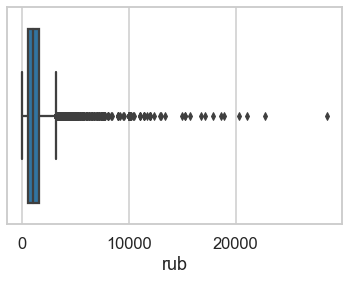

In [123]:
# Распределение чеков 
bills = data\
            .groupby('id_trans')\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'rub'})\
            .round()\
            .sort_values('rub', ascending = False)

bills['rub'] = bills['rub'].apply(lambda x: int(x))

ax = sns.boxplot(x ='rub', data = bills)


In [124]:
bills.describe()

,rub
count,80163.000000
mean,1147.730749
std,804.493247
min,0.000000
25%,500.000000
50%,1000.000000
75%,1571.000000
max,28536.000000


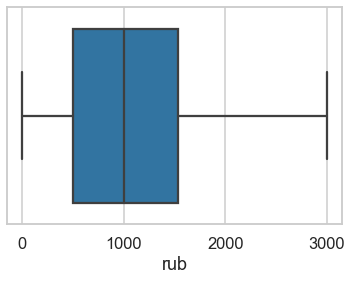

In [125]:
bills = bills[bills['rub'] < 3000]
ax = sns.boxplot(x ='rub', data = bills)

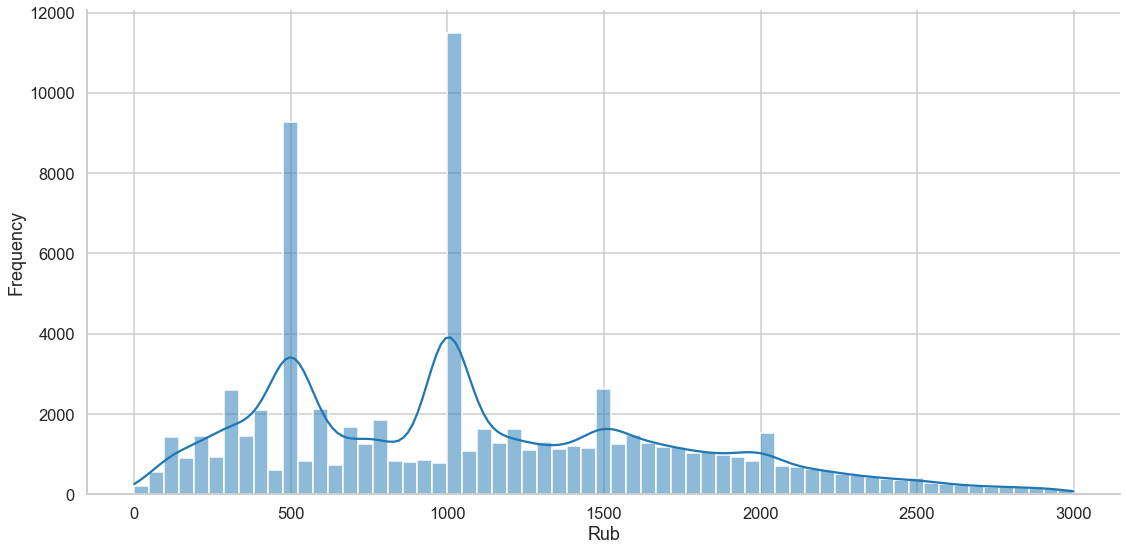

In [126]:
bills = bills[bills['rub'] < 4000]
ax = sns.displot(x ='rub', kde = True, data = bills, height=8, aspect = 2)
ax.set_axis_labels("Rub", "Frequency")

In [127]:
bills.describe()

,rub
count,78724.000000
mean,1094.464128
std,646.112939
min,0.000000
25%,500.000000
50%,1000.000000
75%,1530.000000
max,2999.000000


In [128]:
# Распределение чеков в зависимости от карты лояльности
bills_card = data\
            .groupby(['card_type','id_trans'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'rub'})\
            .round()\

bills_card['rub'] = bills_card['rub'].apply(lambda x: int(x))
bills_card = bills_card[bills_card['rub'] < 4000]

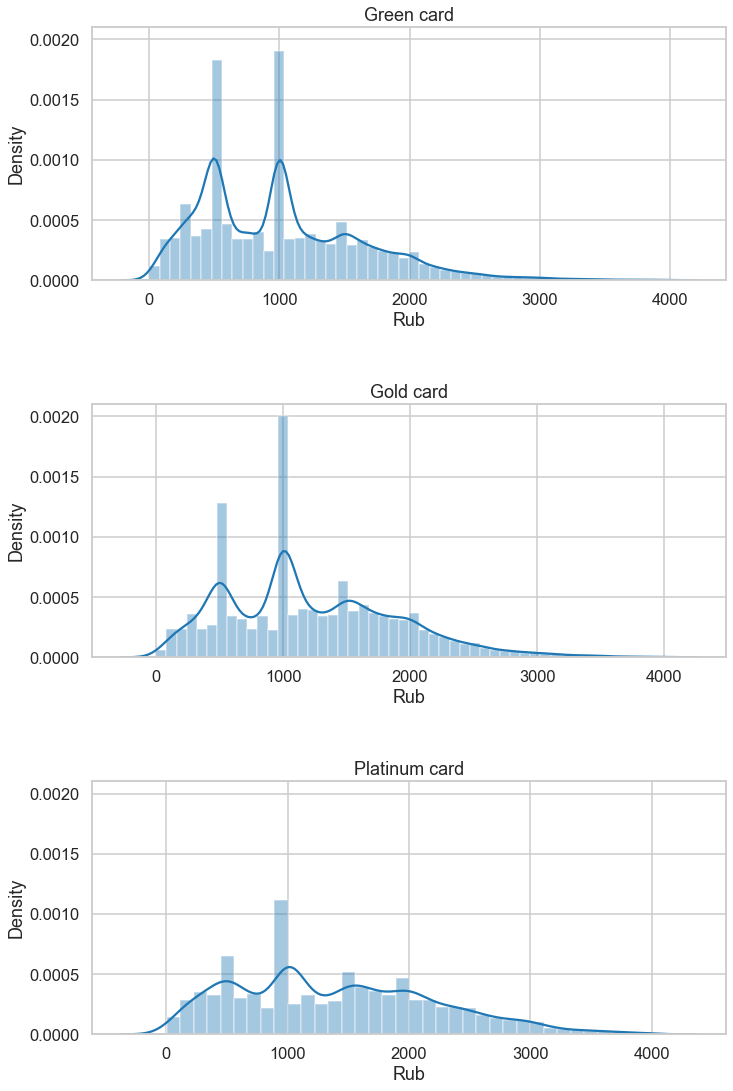

In [129]:
fig, axes = plt.subplots(3,1, figsize=(10,15), sharey = True)
fig.tight_layout(h_pad=5, w_pad=9)
l = 0 

for i in ['Green','Gold','Platinum']:
    k = i
    bills_card_card = bills_card[bills_card['card_type'] == k]
    sns.distplot(x = bills_card_card['rub'], ax = axes[l])
    axes[l].set_title(f'{k} card')
    axes[l].set_xlabel('Rub')
    axes[l].set_ylabel('Density') 
    l += 1


In [130]:
# Распределение чеков больше 4000

bills_card = data\
            .groupby(['card_type','id_trans'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'rub'})\
            .round()\

bills_card['rub'] = bills_card['rub'].apply(lambda x: int(x))
bills_card = bills_card[bills_card['rub'] > 4000]

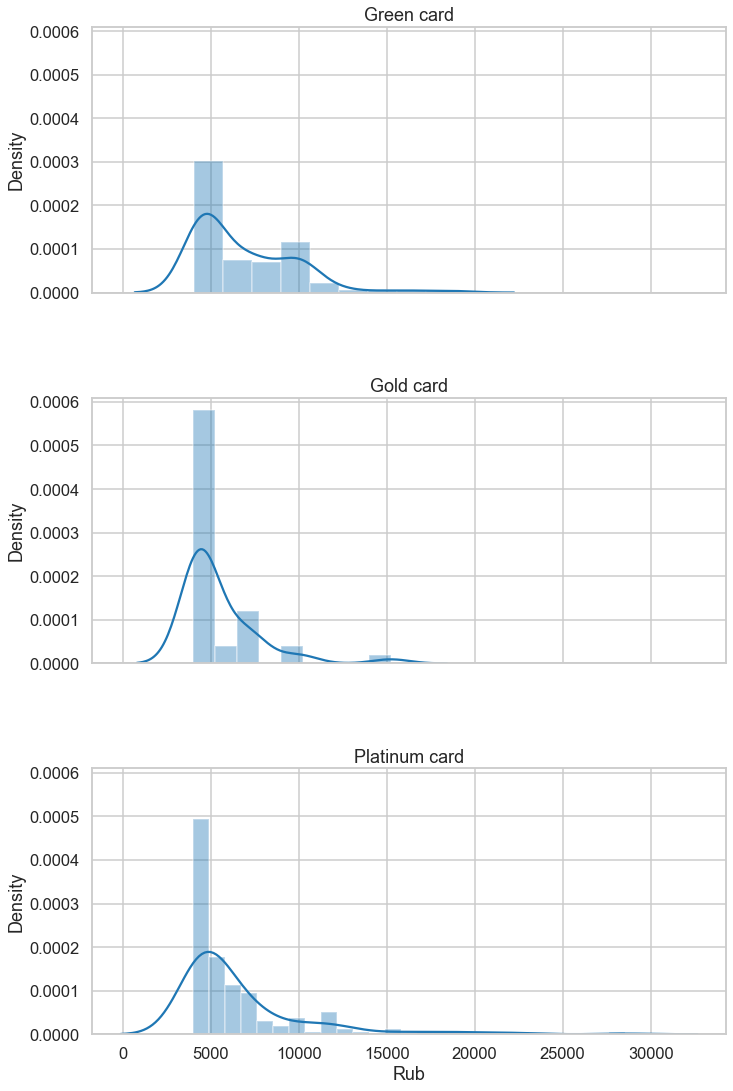

In [131]:
fig, axes = plt.subplots(3,1, figsize=(10,15), sharex=True, sharey = True)
fig.tight_layout(h_pad=5, w_pad=9)
l = 0 

for i in ['Green','Gold','Platinum']:
    k = i
    bills_card_card = bills_card[bills_card['card_type'] == k]
    sns.distplot(x = bills_card_card['rub'], ax = axes[l])
    axes[l].set_title(f'{k} card')
    axes[l].set_xlabel('Rub')
    axes[l].set_ylabel('Density') 
    l += 1


In [132]:
# Распределение чеков в зависимости от станции
bills_station = data\
            .groupby(['station','id_trans'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'rub'})\
            .round()\

bills_station['rub'] = bills_station['rub'].apply(lambda x: int(x))
bills_station = bills_station[bills_station['rub'] < 4000]

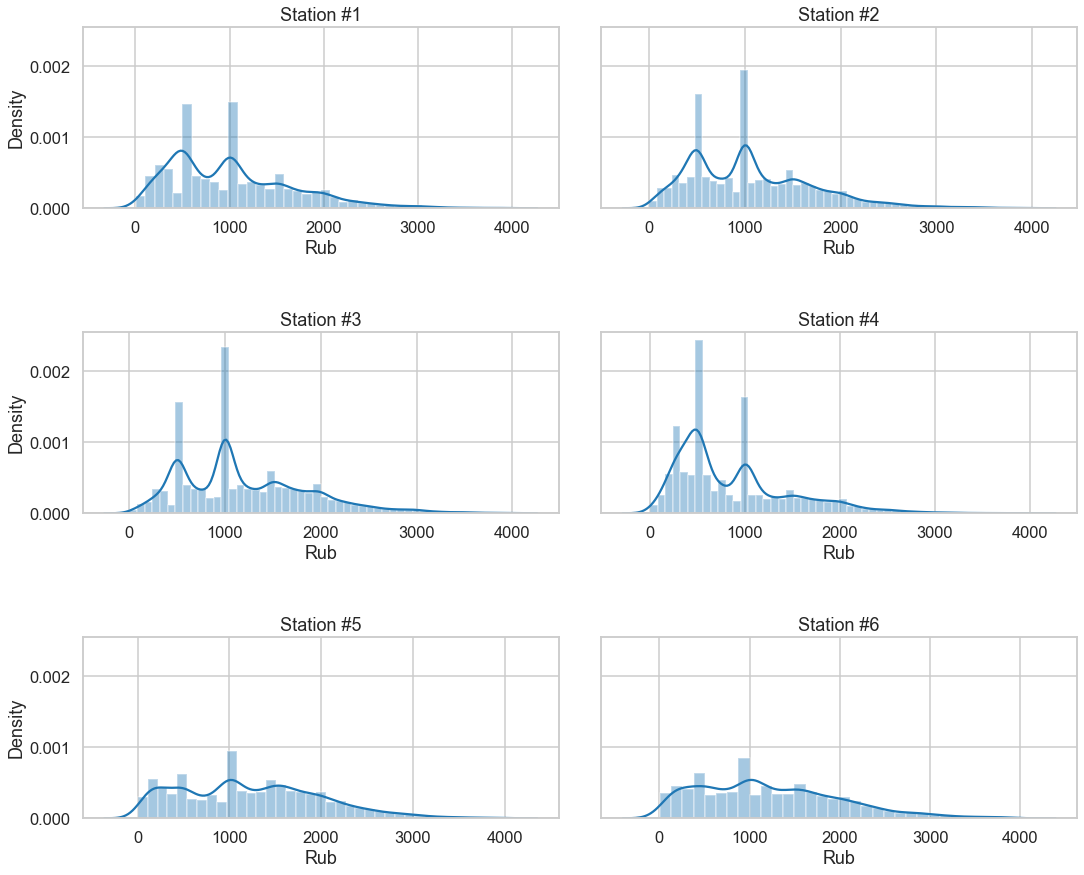

In [105]:
# Распределение чеков в зависимости от карты станции
fig, axes = plt.subplots(3,2, figsize=(15,12), sharey = True )
fig.tight_layout(h_pad=5)
l = 0 

for i in range(6):
    k = str(i + 1)
    bills_station_station = bills_station[bills_station['station'] == k]
    sns.distplot(x = bills_station_station['rub'], ax = axes[l//2, l%2])
    axes[l//2, l%2].set_title(f'Station #{k}')
    axes[l//2, l%2].set_xlabel('Rub')
    axes[l//2, l%2].set_ylabel('Density') 
    l += 1



In [133]:
# Распределение чеков в зависимости от станции
bills_station = data\
            .groupby(['station','id_trans'], as_index = False)\
            .agg({'amount':'sum'})\
            .rename(columns = {'amount':'rub'})\
            .round()\

bills_station['rub'] = bills_station['rub'].apply(lambda x: int(x))
bills_station = bills_station[bills_station['rub'] > 4000]

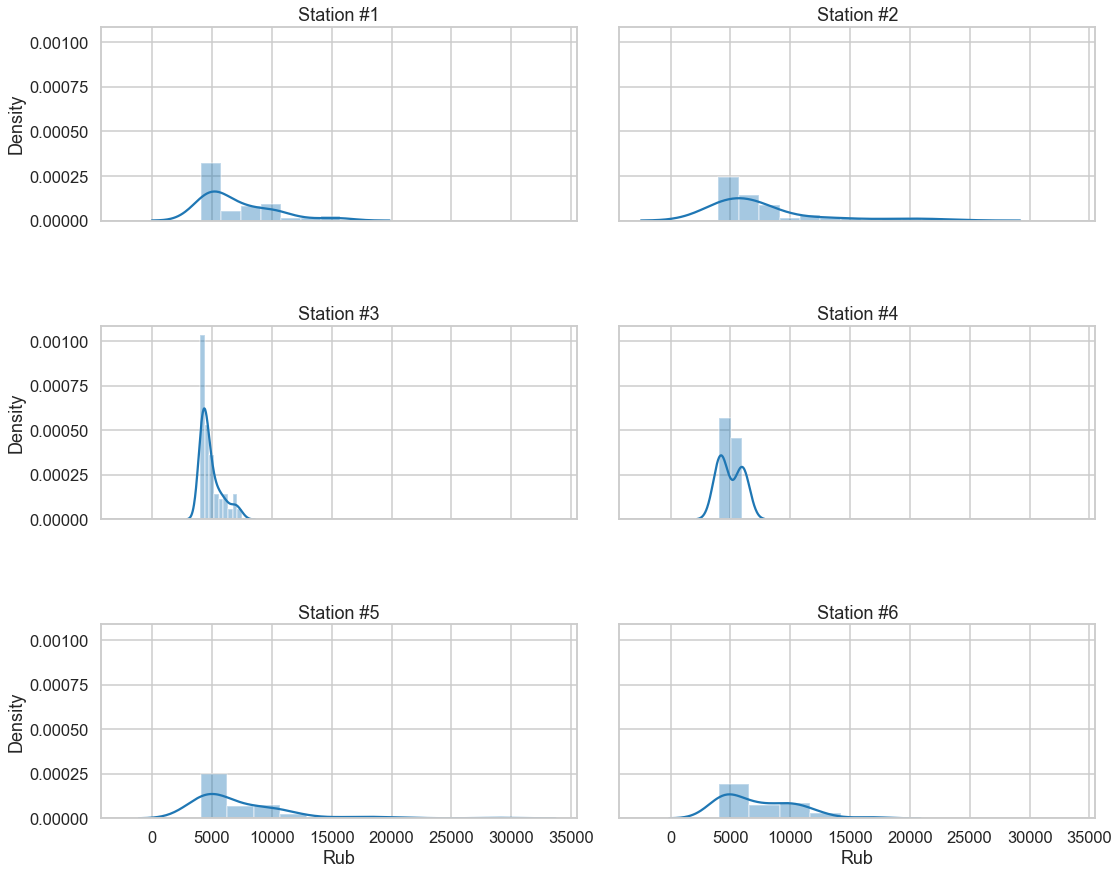

In [134]:
# Распределение чеков в зависимости от карты станции
fig, axes = plt.subplots(3,2, figsize=(15,12), sharey = True, sharex = True )
fig.tight_layout(h_pad=5)
l = 0 

for i in range(6):
    k = str(i + 1)
    bills_station_station = bills_station[bills_station['station'] == k]
    sns.distplot(x = bills_station_station['rub'], ax = axes[l//2, l%2])
    axes[l//2, l%2].set_title(f'Station #{k}')
    axes[l//2, l%2].set_xlabel('Rub')
    axes[l//2, l%2].set_ylabel('Density') 
    l += 1



**Пары покупок**

In [135]:
id_transactions = data['id_trans'].unique()

In [136]:
transactions_matrix = data[['product','id_trans']].values.copy()

In [137]:
double_1 = []

In [138]:
for i in id_transactions:
    products = transactions_matrix[transactions_matrix[:,1] == i][:,0]
    if products.shape[0] > 1:
        products.sort()
        double_1 += list(itertools.combinations(products,2)) 
 

In [139]:
occurence_count = Counter(double_1)

In [140]:
double_massive = occurence_count.most_common(20)

In [141]:
doubles = pd.DataFrame(columns = {'Product_1','Product_2','Count'}, index = np.arange(20))

In [142]:
k = 0
for i in double_massive:
    doubles.iloc[k,0] = i[1]
    doubles.iloc[k,1] = i[0][0]
    doubles.iloc[k,2] = i[0][1]
    k +=1

In [143]:
doubles.set_index('Count', inplace =  True)

In [144]:
doubles.to_csv('doubles.csv', sep = ';', encoding = "cp1251")

### 4.7 Посещаемость заправок

**Посетили 1 раз**

In [145]:
# Будем считать, что если клиент в какой-то день побывал в магазине минимум 1 раз, то это считается за посещение.
# (т.к в течении дня он может побывать несколько раз)
# Посчитаем среднюю разницу в днях между посещениями для кжадого клиента,  преобразуем все в одномерное пр-во.
gaps = data\
            .drop_duplicates(['id_client','day'])\
            .sort_values(['id_client','day'])\
            .groupby('id_client')['day']\
            .apply(list)\
            .apply(np.diff)\
            .values

In [146]:
gaps_list = []
for i in gaps:
    if i.shape[0] > 0:
        gaps_list.append(i.mean())
gaps_list = pd.Series(gaps_list)

In [147]:
gaps_list = gaps_list.round().astype('int')

In [148]:
gaps_list.mean()

12.245644312952006

Text(0, 0.5, 'Frequency')

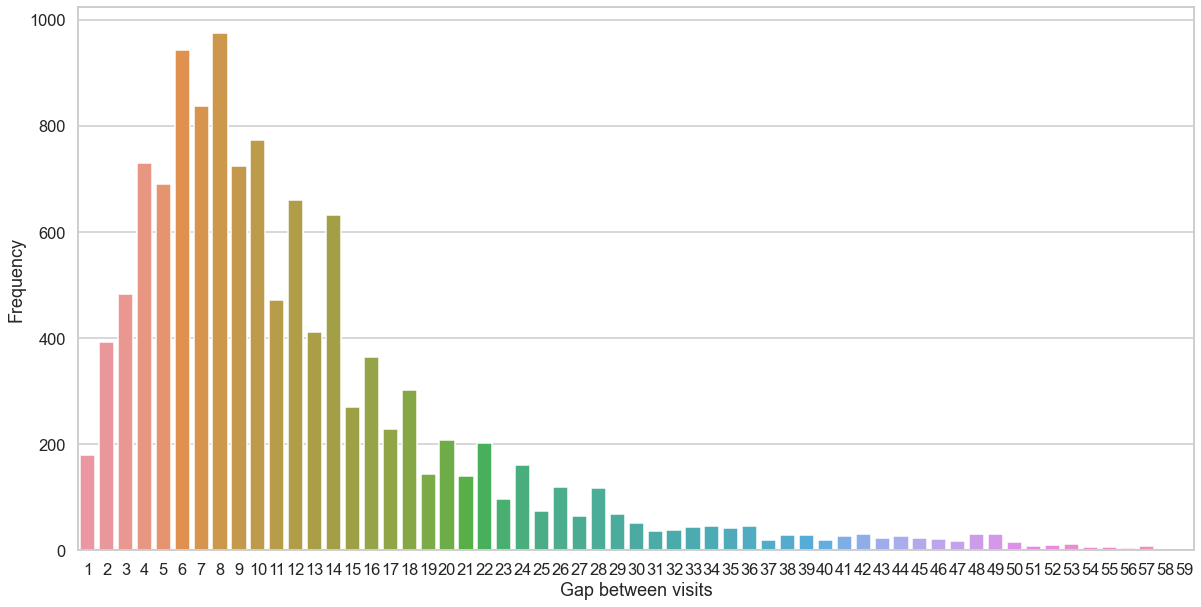

In [149]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = gaps_list.values)
ax.set_xlabel('Gap between visits')
ax.set_ylabel('Frequency') 

In [150]:
dates =pd.to_datetime(data.query('date_start != " "')['date_start'])

In [151]:
dates.sort_values(ascending = False).head(304)

62796    2017-12-07 22:25:50
63056    2017-12-07 21:15:39
63055    2017-12-07 21:15:39
36317    2017-12-07 20:55:33
94073    2017-12-07 20:40:42
                 ...        
26768    2017-12-06 08:32:07
53918    2017-12-06 00:01:48
53916    2017-12-06 00:01:48
53917    2017-12-06 00:01:48
105062   2017-12-05 23:55:47
Name: date_start, Length: 304, dtype: datetime64[ns]